# Here we are doing Web scraping the data from URL :  https://www.businesstimes.com.sg 


Here we are implementing the followings:
    
    1. Ploting the key words in the text
    2. Hilighting named entities in a document
    3. Sentiment analysis
    4. Text summarization

In [1]:
import requests
import bs4
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import re
import os


In [2]:
# Import nltk
import nltk
from nltk.tokenize import RegexpTokenizer



In [3]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns


/home/lohit/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import re
import csv
import pickle
import time
import pprint
from collections import Counter
from datetime import datetime, timedelta
from urllib.request import urlopen
from bs4 import BeautifulSoup  
import pandas as pd

def scraper(keyword):
    """
    takes search term for Business Times (Singapore) news articles, 
    runs scraper through 10 pages of the archive and
    returns dictionary with date (key) and article (value)
    """  
    date_sentiments = {}
    article_text = {}
    counter = 1
    for i in range(4):    
        page = urlopen('https://www.businesstimes.com.sg/search/'+ keyword +'\?page='+str(i)).read()
        soup = BeautifulSoup(page, features="html.parser")
        posts = soup.findAll("div", {"class": "media-body"})
        for post in posts:  
            time.sleep(1)
            url = post.a['href']
            date = post.time.text
            print("Article count: ", counter)
            print("Date: ", date)
            print("URL: ", url[:100] + "...")
            counter += 1 
            if counter==8:
                break
            try:
                link_page = urlopen(url).read()
            except:
                url = url[:-2]
                link_page = urlopen(url).read()         
            link_soup = BeautifulSoup(link_page)
            sentences = link_soup.findAll("p")
            passage = ""
            for sentence in sentences:
                passage += sentence.text  
            article_text.setdefault(date, []).append(passage)
    articles = {}
    for k,v in article_text.items():
        articles[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = v 
    return articles

# runs scraper function with search term "shell" (for the company Royal Dutch Shell)
articles = scraper("shell")

# converts the dict into a pandas data frame and 
# deals with articles that appear on same date (creating more than one content column)
df = pd.DataFrame.from_dict(articles, columns=['1', '2'], orient='index')
df['content'] = df['1'] + ' ' + df['2'].fillna('')
df.drop(columns=['1', '2'], inplace=True)

# pickles dataframe and saves it in a data folder
f = open('/home/lohit/Downloads/Data_SampleGen1/Raw/[IN-023C]/2018/2018-12/Inverter_1/df.pkl', 'wb')
pickle.dump(df, f)
f.close()

Article count:  1
Date:  17 Apr 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-greenlights-a10b-australia-natural-gas-pro...
Article count:  2
Date:  17 Apr 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-vows-to-become-carbon-neutral-by-2050...
Article count:  3
Date:  16 Apr 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/oil-giant-shell-vows-to-become-carbon-neutral-by...
Article count:  4
Date:  14 Apr 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-exxon-halt-some-gulf-of-mexico-output-due-...
Article count:  5
Date:  01 Apr 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-slows-refining-takes-up-to-us800m-hit-afte...
Article count:  6
Date:  31 Mar 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-sees-oil-sales-volume-margins-holding-up-i...
Article count:  7
Date:  31 Mar 2020
URL:  https://www.businesstimes.com.sg/energy-commodities/shell-drops-out-of-major-us-

In [7]:
df['content'][5]

'[SINGAPORE] Shell said on Friday it had identified an employee at its main Singapore office who had been in contact with a coronavirus case and had advised other staff close to him to work from home.The firm did not say how many staff it had impacted at its office in The Metropolis...Get our introductory offer at onlyCancel anytime*$0.99/month for first 3 months$29.90/month for the next 9 monthsNeed help?CALL +65 6388 3838 EMAIL btocs@sph.com.sgOPERATING HOURS (+8 GMT) MON-FRI: 8:30AM-5:30PM[SINGAPORE]\xa0Why do we get so angsty about petrol prices whenever crude oil prices fall?CO-WORKING operator Found8 on Saturday said it will offer all active members in Singapore 30 per cent off fees for...[SINGAPORE] The Ministry of Health (MOH) confirmed another 618 new Covid-19 cases on Saturday, taking the total...[NEW YORK] Several publicly listed companies worth hundreds of millions of dollars said on Friday they had no plans...[NEW YORK] AT&T, the telecommunications giant that has moved int

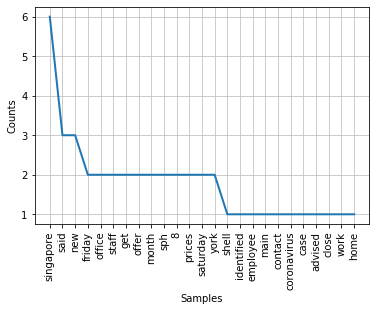

In [8]:
# Plot the key words in the data
x=df['content'][5]

tokenizer = RegexpTokenizer('\w+'
                           )
# Create tokens
tokens = tokenizer.tokenize(x)

# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
# Initialize new list
words_ns = []
# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)
# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

In [9]:
import spacy
# only run line 3 if language model has not been pre-installed
# !python -m spacy download en_core_web_lg
# spacy_nlp = spacy.load('')
# spacy_nlp = spacy.load('en_core_web_md')
import en_core_web_sm

spacy_nlp = en_core_web_sm.load()

from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy.prefer_gpu()

import matplotlib.pyplot as plt
import seaborn as sns

# show Spacy's NLP pipeline components
spacy_nlp.pipe_names

# sample - not WHOLE DOC
sample = df.iloc[2]['content']
print(sample[:512])

#create Spacy object and run NLP pipeline
doc = spacy_nlp(sample)

# before
tokens = [token.text for token in doc]
print(tokens[:25])

#after 
tokens = [token.lemma_ for token in doc if not token.is_stop]
print(tokens[:25])

# noun chunks
chunks = [chunk.text for chunk in doc.noun_chunks]
print(chunks[3:15])

# sentenciser (if that's a real word!)
sentences = [sent.string.strip() for sent in doc.sents]
pprint.pprint(sentences[:3])

# Named-entity recognition (NER)

# shows an NER, its abbrevation (label) and the full name
NER_labels = [(X.text, X.label_, spacy.explain(X.label_)) for X in doc.ents]
NER_labels[:10]



[NEW YORK] A leak in a pipeline that carries oil from US Gulf of Mexico offshore facilities has halted production at two fields, Exxon Mobil Corp and Royal Dutch Shell said on Monday.Shell said it temporarily halted production on its 100,000-barrel-per-day deepwater Perdido production hub last Thursday after a subsurface leak was discovered on Exxon's Hoover Offshore Oil Pipeline System (HOOPS). Production on Exxon's Hoover platform also was halted because of the leak, Exxon said.The HOOPS pipeline has been
['[', 'NEW', 'YORK', ']', 'A', 'leak', 'in', 'a', 'pipeline', 'that', 'carries', 'oil', 'from', 'US', 'Gulf', 'of', 'Mexico', 'offshore', 'facilities', 'has', 'halted', 'production', 'at', 'two', 'fields']
['[', 'NEW', 'YORK', ']', 'leak', 'pipeline', 'carry', 'oil', 'Gulf', 'Mexico', 'offshore', 'facility', 'halt', 'production', 'field', ',', 'Exxon', 'Mobil', 'Corp', 'Royal', 'Dutch', 'Shell', 'say', 'Monday', '.']
['that', 'oil', 'Mexico', 'production', 'two fields', 'Exxon Mobil

[('NEW YORK', 'GPE', 'Countries, cities, states'),
 ('US Gulf', 'LOC', 'Non-GPE locations, mountain ranges, bodies of water'),
 ('Mexico', 'GPE', 'Countries, cities, states'),
 ('two', 'CARDINAL', 'Numerals that do not fall under another type'),
 ('Exxon Mobil Corp', 'ORG', 'Companies, agencies, institutions, etc.'),
 ('Royal Dutch Shell', 'ORG', 'Companies, agencies, institutions, etc.'),
 ('Monday', 'DATE', 'Absolute or relative dates or periods'),
 ('Shell', 'ORG', 'Companies, agencies, institutions, etc.'),
 ('Perdido', 'PRODUCT', 'Objects, vehicles, foods, etc. (not services)'),
 ('last Thursday', 'DATE', 'Absolute or relative dates or periods')]

In [10]:
# highlights named entities in a document (here the first 13 sentences of it)
displacy.render(spacy_nlp(str(sentences[:13])), jupyter=True, style='ent')

In [11]:
# to apply NER to all articles, we concatenate all rows of the dataframe
whole = spacy_nlp(df.content.str.cat(sep=' '))

# here we look at the categories and the number of occurrences 
labels = [spacy.explain(x.label_) for x in whole.ents]
Counter(labels)

# this shows the most frequent named entities
items = [x.text for x in whole.ents]
Counter(items).most_common(10)

# apply lemmatisation + stopword removal to all words; show the most frequest of those
words = [token.lemma_ for token in whole.doc if token.is_stop != True and token.is_punct != True]
Counter(words).most_common(10)

[('say', 122),
 ('Shell', 98),
 ('company', 67),
 ('price', 65),
 ('oil', 62),
 ('SINGAPORE', 53),
 ('YORK', 53),
 ('[NEW', 52),
 ('Saturday', 51),
 ('term', 50)]

In [12]:
from textblob import TextBlob

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
import lexicon


df['spacy_tokens'] = df['content'].apply(spacy_nlp)

def spacy_lemma_stopwords(text):
    """remove stopwords and lemmatise all spacy tokens"""
    return [token.lemma_ for token in text if not token.is_stop]

spacy_process = lambda x: spacy_lemma_stopwords(x)
df["spacy_processed"] = df.spacy_tokens.apply(spacy_process)

def spacy_to_string(text):
    """convert lemmatised Spacy tokens back to string"""
    return ' '.join(text)

spacy_to_str = lambda x: spacy_to_string(x)
df["spacy_string"] = df.spacy_processed.apply(spacy_to_str)

# Apply sentiment algorithms
TB = lambda x: round(TextBlob(x).sentiment.polarity, 3)
NLTK = lambda x: round(sia.polarity_scores(x)['compound'], 3)

df['TextBlob_spacy'] = df.spacy_string.apply(TB)
df['NLTK_spacy'] = df.spacy_string.apply(NLTK)

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lohit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,spacy_tokens,spacy_processed,spacy_string,TextBlob_spacy,NLTK_spacy
2020-04-18,[SYDNEY] Royal Dutch Shell said on Friday it h...,"([, SYDNEY, ], Royal, Dutch, Shell, said, on, ...","[[, SYDNEY, ], Royal, Dutch, Shell, say, Frida...",[ SYDNEY ] Royal Dutch Shell say Friday take f...,0.036,-0.825
2020-04-17,[LONDON] Anglo-Dutch oil giant Royal Dutch She...,"([, LONDON, ], Anglo, -, Dutch, oil, giant, Ro...","[[, LONDON, ], anglo, -, dutch, oil, giant, Ro...",[ LONDON ] anglo - dutch oil giant Royal Dutch...,0.038,-0.939
2020-04-15,[NEW YORK] A leak in a pipeline that carries o...,"([, NEW, YORK, ], A, leak, in, a, pipeline, th...","[[, NEW, YORK, ], leak, pipeline, carry, oil, ...",[ NEW YORK ] leak pipeline carry oil Gulf Mexi...,-0.006,-0.402
2020-04-02,LondonROYAL Dutch Shell slowed refining output...,"(LondonROYAL, Dutch, Shell, slowed, refining, ...","[LondonROYAL, Dutch, Shell, slow, refining, ou...",LondonROYAL Dutch Shell slow refining output w...,-0.037,0.331
2020-04-01,[LONDON] Royal Dutch Shell Plc said it doesn't...,"([, LONDON, ], Royal, Dutch, Shell, Plc, said,...","[[, LONDON, ], Royal, Dutch, Shell, Plc, say, ...",[ LONDON ] Royal Dutch Shell Plc say expect co...,0.024,0.782


In [13]:
df['spacy_string'][1]

'[ LONDON ] anglo - dutch oil giant Royal Dutch Shell pledge Thursday carbon neutral 2050 , match commitment rival BP climate change loom large energy sector . "Society expectation shift quickly debate climate change , " chief executive Ben van Beurden say statement . "Shell need ambition , aim net - zero emission energy business 2050 sooner . society , customer , expect . "The company say plan net zero emission manufacture product 2050 " latest" . seek " step society aim limit average temperature rise 1.5 degree Celsius , line goal Paris Agreement climate change" . sign , agree Privacy Policy term Conditions . Shell look reduce describe " net carbon footprint " energy product 65 cent 2050 , 30 cent 2035.it try pivot serve business sector aim net - zero emission 2050.the pledge come sector ravage collapse oil price . world oil price nosedive Wednesday near - decade low , WTI crude tumble us$ 20 barrel , dire warning virus - trigger demand shock overshadow deal cut output . price crumbl

In [14]:
df['content'][1]

'[LONDON] Anglo-Dutch oil giant Royal Dutch Shell pledged Thursday to become carbon neutral by 2050, matching a commitment by rival BP as climate change looms large over the energy sector."Society\'s expectations have shifted quickly in the debate around climate change," chief executive Ben van Beurden said in a statement."Shell now needs to go further with our own ambitions, which is why we aim to be a net-zero emissions energy business by 2050 or sooner. Society, and our customers, expect nothing less."The company said it planned to have net zero emissions from the manufacture of all its products by 2050 "at the latest".It will also seek "to be in step with society\'s aim to limit the average temperature rise to 1.5 degrees Celsius, in line with the goals of the Paris Agreement on climate change".By signing up, you agree to our Privacy Policy and Terms and Conditions.Shell will look to reduce what it described as the "net carbon footprint" of its energy products by around 65 per cent

# Sentiment analysis

In [15]:

def get_tweet_sentiment(tweet): 
        ''' 
        Utilityfunction to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 

        analysis = TextBlob(tweet) 

        # set sentiment 
        
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [16]:
def get_tweets(fetched_tweets): 
    parsed_tweet = []

    for tweet in fetched_tweets: 
        parsed_tweet.append(get_tweet_sentiment(tweet))

    return parsed_tweet

In [17]:
z=get_tweets(df['content'])
list(z)

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive']

In [18]:
import collections
counter=collections.Counter(z)
counter

Counter({'positive': 19, 'negative': 5})

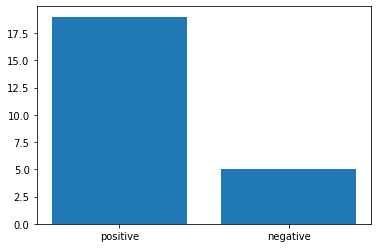

In [19]:
import matplotlib.pyplot as plt

D = counter

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()

# Text summarization

In [20]:
# importing libraries 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 

# Input text - to summarize 
text = df['content'][1]

# Tokenizing the text 
stopWords = set(stopwords.words("english")) 
words = word_tokenize(text) 

# Creating a frequency table to keep the 
# score of each word 

freqTable = dict() 
for word in words: 
    word = word.lower() 
    if word in stopWords: 
        continue
    if word in freqTable: 
        freqTable[word] += 1
    else: 
        freqTable[word] = 1

# Creating a dictionary to keep the score 
# of each sentence 
sentences = sent_tokenize(text) 
sentenceValue = dict() 

for sentence in sentences: 
    for word, freq in freqTable.items(): 
        if word in sentence.lower(): 
            if sentence in sentenceValue: 
                sentenceValue[sentence] += freq 
            else: 
                sentenceValue[sentence] = freq 



sumValues = 0
for sentence in sentenceValue: 
    sumValues += sentenceValue[sentence] 

# Average value of a sentence from the original text 

average = int(sumValues / len(sentenceValue)) 

# Storing sentences into our summary. 
summary = '' 
for sentence in sentences: 
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.5 * average)): 
        summary += " " + sentence 

print(len(summary))        
print(summary) 


2730
 "The company said it planned to have net zero emissions from the manufacture of all its products by 2050 "at the latest".It will also seek "to be in step with society's aim to limit the average temperature rise to 1.5 degrees Celsius, in line with the goals of the Paris Agreement on climate change".By signing up, you agree to our Privacy Policy and Terms and Conditions.Shell will look to reduce what it described as the "net carbon footprint" of its energy products by around 65 per cent by 2050, and by 30 per cent by 2035.It will also try and pivot towards serving businesses and sectors that also aim for net-zero emissions by 2050.The pledge comes as the sector has been ravaged by collapsing oil prices.World oil prices nosedived Wednesday to near two-decade lows, with WTI crude tumbling under US$20 a barrel, as dire warnings about a virus-triggered demand shock overshadowed a deal to cut output.Prices have crumbled as the virus slams the global economy and its appetite for energy,

In [21]:
df['content'][1]

'[LONDON] Anglo-Dutch oil giant Royal Dutch Shell pledged Thursday to become carbon neutral by 2050, matching a commitment by rival BP as climate change looms large over the energy sector."Society\'s expectations have shifted quickly in the debate around climate change," chief executive Ben van Beurden said in a statement."Shell now needs to go further with our own ambitions, which is why we aim to be a net-zero emissions energy business by 2050 or sooner. Society, and our customers, expect nothing less."The company said it planned to have net zero emissions from the manufacture of all its products by 2050 "at the latest".It will also seek "to be in step with society\'s aim to limit the average temperature rise to 1.5 degrees Celsius, in line with the goals of the Paris Agreement on climate change".By signing up, you agree to our Privacy Policy and Terms and Conditions.Shell will look to reduce what it described as the "net carbon footprint" of its energy products by around 65 per cent